# Regressão Linear usando TensorFlow/Keras

1 Exploração de conjuntos de dados
2 Modelo de Regressão Linear
3 Perspectiva e Terminologia de Redes Neurais
4 Modelando uma Rede Neural em Keras
5 Conclusão

# 0 INSTALAÇÃO E IMPORTAÇÃO

## 0.1 Instalação

In [3]:
#!pip install tensorflow
#!pip install opendatasets

## 0.2 Importação das bibliotecas

In [4]:
import numpy as np
import pandas as pd
import os
import random

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


In [7]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [8]:
#

# 1 CARREGAMENTO DO DATASET

In [9]:
# Caminho do dataset redimensionado (224x224)
base_dir = '../data/Plastic_Classification_224'

In [10]:
# Parâmetros
image_size = (224, 224)
batch_size = 32

In [11]:
# Carregamento dos dados
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'train'),
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True,
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'validation'),
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True,
    seed=42
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'test'),
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=False
)

# Normalização dos pixels para [0, 1]
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Found 1441 files belonging to 7 classes.
Found 416 files belonging to 7 classes.
Found 209 files belonging to 7 classes.


# 2 Construção do modelo (Regressão Linear)

🎯 Objetivo:
Criar um modelo simples com:

- Flatten: transforma a imagem 3D em vetor 1D

- Dense: camada linear com saída igual ao número de classes (7)

- Sem ativação, pois será tratado com categorical_crossentropy (softmax embutido)

In [12]:
# Definir o formato de entrada e número de classes
input_shape = (224, 224, 3)
num_classes = 7

# Construção do modelo
model = models.Sequential([
    layers.Flatten(input_shape=input_shape),  # Converte 224x224x3 → vetor 150528
    layers.Dense(num_classes)                # Camada linear (sem ativação)
])

# Compilação do modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',   # Usamos softmax embutido no cálculo da perda
    metrics=['accuracy']
)

# Resumo da arquitetura
model.summary()


C:\Users\graci.DESKTOP-I7T8UK6\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │       1,053,703 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,053,703 (4.02 MB)

 Trainable params: 1,053,703 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

# 3 Treinar o modelo

🎯 Objetivo:
    
- Treinar o modelo com os dados de train_ds, validando a performance com val_ds.

In [13]:
# Treinamento
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - accuracy: 0.1324 - loss: 5.4812 - val_accuracy: 0.1418 - val_loss: 5.3548
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.1301 - loss: 5.4886 - val_accuracy: 0.1418 - val_loss: 5.2895
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.1493 - loss: 5.3483 - val_accuracy: 0.1418 - val_loss: 5.1515
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.1290 - loss: 5.0738 - val_accuracy: 0.1418 - val_loss: 4.6126
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.1291 - loss: 4.5551 - val_accuracy: 0.1418 - val_loss: 4.5332
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.1427 - loss: 4.7608 - val_accuracy: 0.1418 - val_loss: 4.5332
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.1242 - loss: 4.3634 - val_accuracy: 0.1418 - val_loss: 4.5332
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.1366 - loss: 4.6511 - val_accuracy: 0.1418 -

# 4 Visualizar o desempenho (gráficos)

🎯 Objetivo:
- Plotar a curva de perda e acurácia durante o treino.

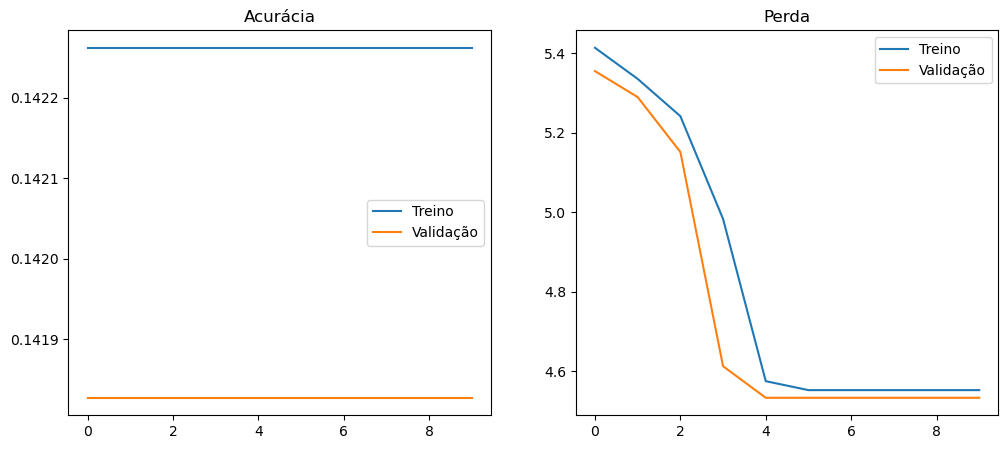

In [14]:
# Função para plotar métricas de treino/validação
def plot_history(hist):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Acurácia
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Treino')
    plt.plot(epochs_range, val_acc, label='Validação')
    plt.title('Acurácia')
    plt.legend()

    # Perda
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Treino')
    plt.plot(epochs_range, val_loss, label='Validação')
    plt.title('Perda')
    plt.legend()

    plt.show()

# Chamar a função
plot_history(history)


# 5 Avaliar no conjunto de teste

In [15]:
test_loss, test_acc = model.evaluate(test_ds)
print(f'\n🎯 Acurácia no conjunto de teste: {test_acc:.2%}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.1124 - loss: 5.2031

🎯 Acurácia no conjunto de teste: 13.88%


# 6 Fazer previsões com o modelo de regressão linear

🎯 Objetivo:
- Usar model.predict() em imagens do test_ds

- Ver as classes preditas e reais

- Visualizar algumas imagens com o rótulo previsto

In [18]:
# Recarrega apenas uma vez o test_ds sem normalizar
raw_test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'test'),
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical',
    shuffle=False
)

# Salva os nomes das classes
class_names = raw_test_ds.class_names
print("Classes:", class_names)


Found 209 files belonging to 7 classes.
Classes: ['HDPE', 'LDPA', 'Other', 'PET', 'PP', 'PS', 'PVC']


In [19]:
# Obter um lote de imagens e rótulos
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    break  # pega apenas o primeiro batch


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [20]:
# Transformar vetores one-hot em índices
true_labels = np.argmax(labels, axis=1)
pred_labels = np.argmax(preds, axis=1)

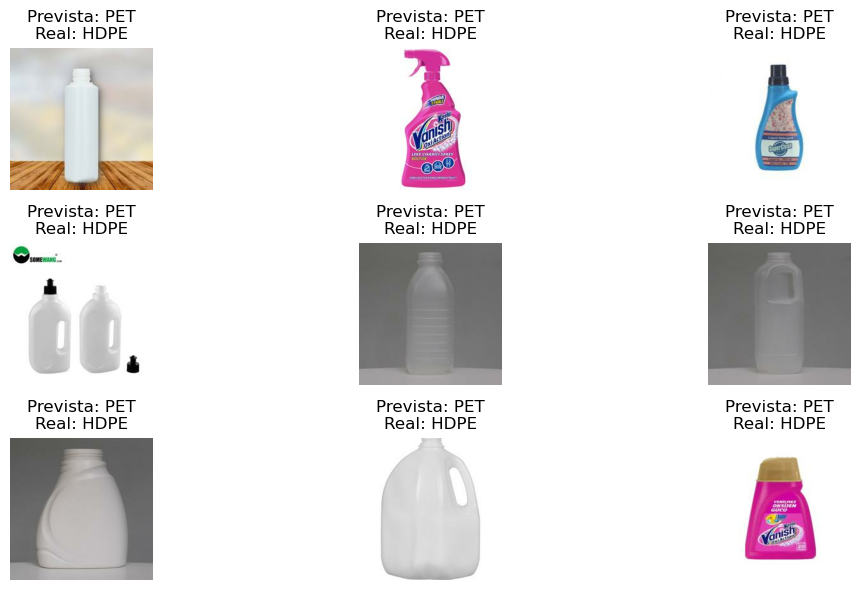

In [24]:
#Mostrar algumas imagens com a classe predita

plt.figure(figsize=(12, 6))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    # Corrige: imagem foi normalizada, então multiplicamos por 255
    plt.imshow((images[i].numpy() * 255).astype("uint8"))
    plt.title(f"Prevista: {class_names[pred_labels[i]]}\nReal: {class_names[true_labels[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# 7 Matriz de confusão

🎯 Objetivo:
- Comparar rótulos reais vs rótulos previstos

- Visualizar a matriz com seaborn ou sklearn

In [25]:
# Obter todas as previsões do conjunto de teste
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))   # one-hot → índice
    y_pred.extend(np.argmax(preds, axis=1))             # logits → índice


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


C:\Users\graci.DESKTOP-I7T8UK6\AppData\Local\Temp\ipykernel_16104\2525586782.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


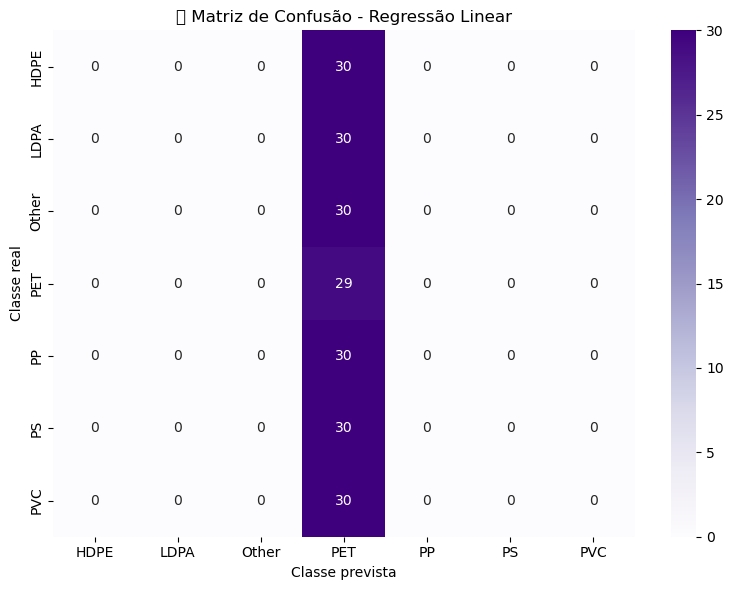

In [27]:
# Gerar matriz de confusão

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
plt.title("🔍 Matriz de Confusão - Regressão Linear")
plt.tight_layout()
plt.show()


In [28]:

print(classification_report(y_true, y_pred, target_names=class_names))


              precision    recall  f1-score   support

        HDPE       0.00      0.00      0.00        30
        LDPA       0.00      0.00      0.00        30
       Other       0.00      0.00      0.00        30
         PET       0.14      1.00      0.24        29
          PP       0.00      0.00      0.00        30
          PS       0.00      0.00      0.00        30
         PVC       0.00      0.00      0.00        30

    accuracy                           0.14       209
   macro avg       0.02      0.14      0.03       209
weighted avg       0.02      0.14      0.03       209



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 8 Previsão de imagem única (manual) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


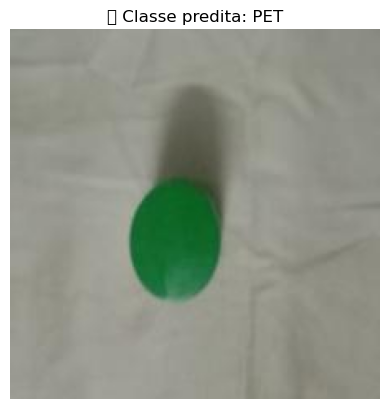

In [37]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Escolher a classe (substitua por qualquer uma disponível no dataset)
classe = 'PP'
pasta = f'../data/Plastic_Classification_224/test/{classe}/'
imagem_path = os.path.join(pasta, os.listdir(pasta)[2])  # usa a primeira imagem da pasta

# Parâmetros do modelo
img_height, img_width = 224, 224

# Carregar e pré-processar a imagem
img = image.load_img(imagem_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)           # transforma em array
img_array = img_array / 255.0                 # normaliza
img_array = np.expand_dims(img_array, axis=0) # adiciona batch dimension (1, 224, 224, 3)

# Fazer a previsão
pred = model.predict(img_array)
classe_predita = class_names[np.argmax(pred)]

# Mostrar a imagem e o resultado
plt.imshow(img)
plt.axis("off")
plt.title(f"🔍 Classe predita: {classe_predita}")
plt.show()
